## Gini coefficient

$ c = \frac{\sum_i^n \sum_j^n |x_i -x_j| } {2n^2 * \bar{x} }$

In [3]:
import glob
import os
from utils import load_net
import matplotlib.pyplot as plt
import numpy as np


def extract_sizes(path):
    sizes = []
    for f in glob.glob(path):
        fname = os.path.basename(f)
        toex = fname.split('-')[0]
        if '.' in toex:
            sizes.append(float(toex))
        else:
            sizes.append(int(toex))
    return sorted(sizes)

def read_randoms(di,runs=4):
    rres = dict()
    gms = extract_sizes(f"../res/newclusterres/{di}/4/*-evalresults.pickle")
    print('Got sizes: ',gms)
    
    for seed in range(1,runs+1):
        nets = list()
        for size in gms:
            #merged-1007-0-tc-nets-voting.pickle
            net_name = f"../res/newclusterres/{di}/{seed}/merged-{size}-0-tc-nets-voting.pickle"
            
            _, net = load_net(net_name)
            nets.append(net)
        rres[seed] = nets

    return rres

In [53]:
r = read_randoms(di='break10', runs=10)

Got sizes:  [43, 79, 104, 411, 640, 1007]


In [54]:
r4 = read_randoms(di='break04', runs=4)

Got sizes:  [0.65, 0.75, 0.85, 0.95]


In [55]:
for k,v in r4.items():
    print(k, list(map(len, v))) 
print('---')
for k,v in r.items():
    print(k, list(map(len, v)))

1 [996, 677, 409, 155]
2 [1011, 672, 415, 160]
3 [1024, 720, 416, 161]
4 [997, 686, 406, 157]
---
1 [43, 79, 104, 410, 640, 1007]
2 [43, 79, 104, 411, 640, 1006]
3 [43, 79, 104, 410, 639, 1006]
4 [43, 79, 104, 411, 640, 1006]
5 [43, 79, 104, 411, 640, 1006]
6 [43, 79, 104, 411, 640, 1007]
7 [43, 79, 104, 411, 639, 1005]
8 [43, 79, 104, 411, 640, 1006]
9 [43, 79, 104, 411, 640, 1007]
10 [43, 79, 104, 411, 640, 1007]


In [51]:
def gini(net):
    votes = list(map(sum, net.values()))
    dsum = 0
    for a in votes:
        for b in votes:
            dsum += abs(a-b)
    return dsum/(2*len(votes)**2*np.mean(votes))

def get_cof(nets):
    res =dict()
    for n in nets:
        res[len(n)]= gini(n)

    return res

In [9]:
get_vo = lambda x: sorted(list(map(sum, x.values())))

def plot_with_gini(net, ran):    
    plt.figure(figsize=(10,8))
    plt.title(f"Votes distribution streamed net % vs. streamed random (apk_net ={sum(get_vo(net))} apk_ran={sum(get_vo(ran))})")

    plt.plot(get_vo(net), label=f"net anchors={len(net)} gini={gini(net)}")
    plt.plot(get_vo(ran), label=f"rand anchors={len(ran)} gini={gini(ran)}")
    plt.xlabel('Anchor')
    plt.ylabel('Number of votes')
    plt.legend();
    


## Streamed net 40% with $\epsilon$=0.85

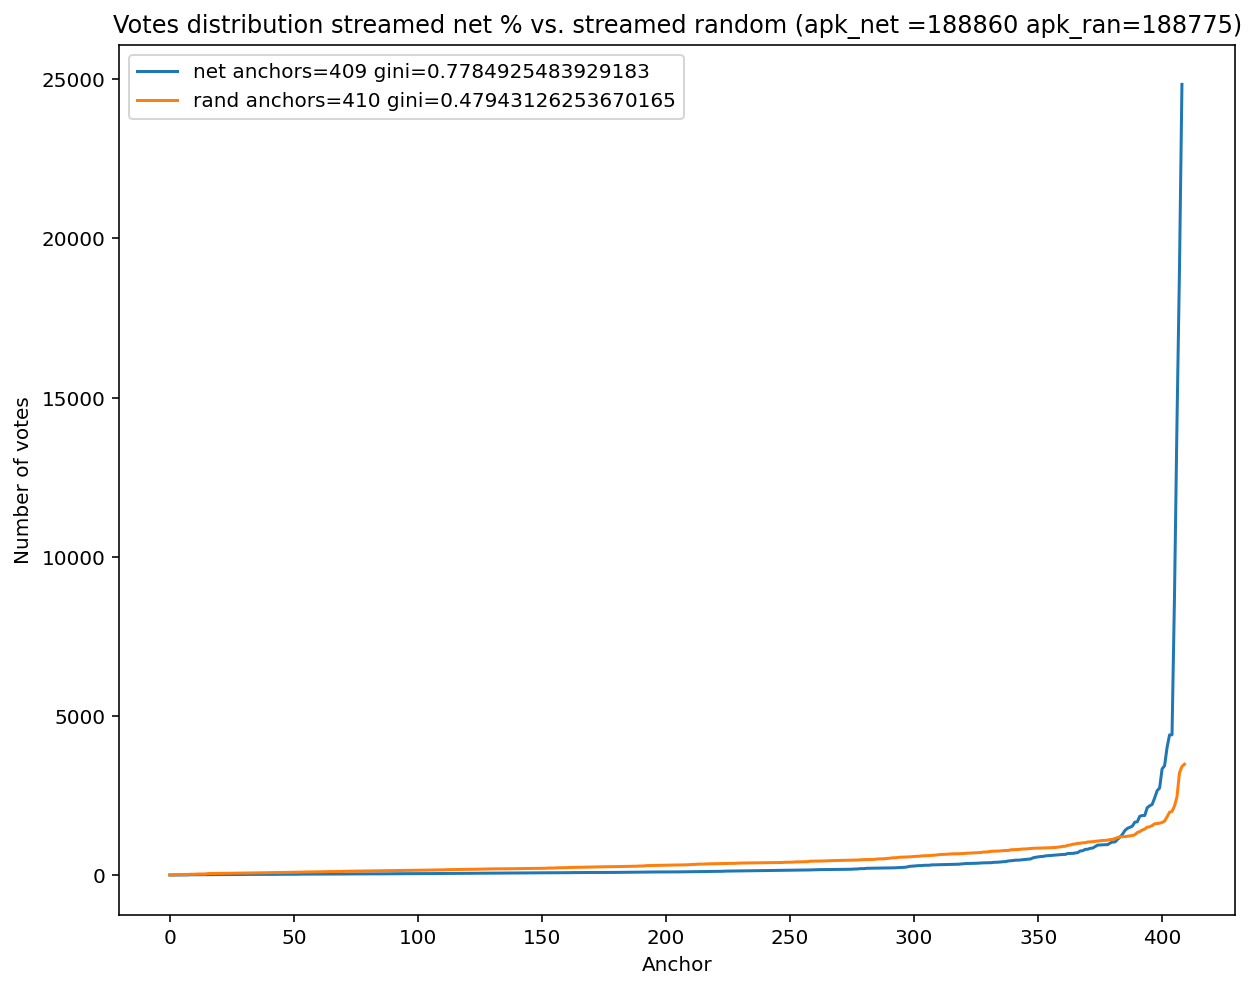

In [136]:
#[0.65, 0.75, 0.85, 0.95]
plot_with_gini(net=r4[1][2], ran=r[1][3])

## Streamed net 40% with $\epsilon$=0.65

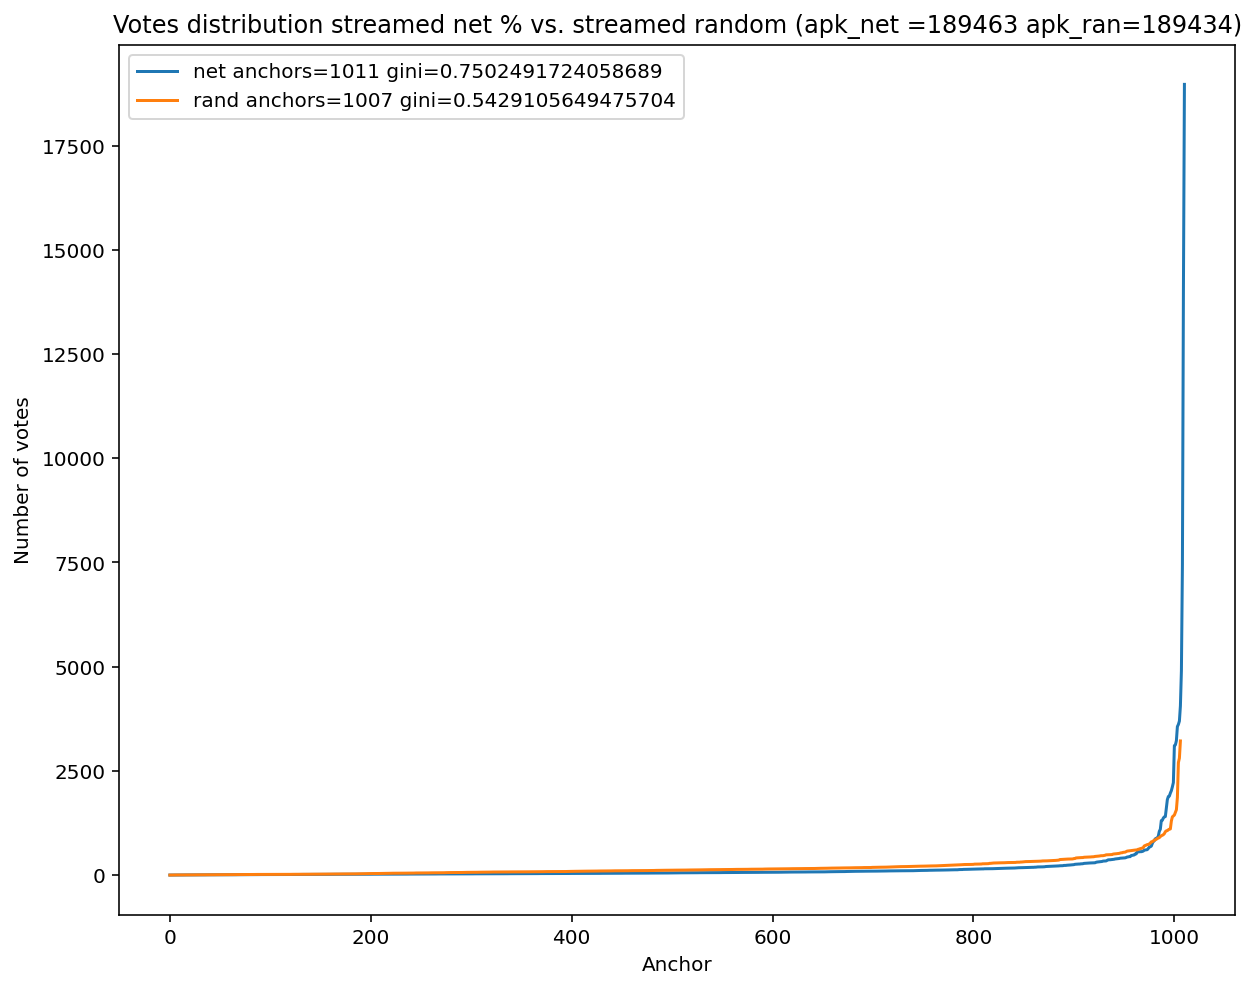

In [137]:
plot_with_gini(net=r4[2][0],ran=r[1][5])

In [110]:
gamma, max_n8 = load_net('../res/newclusterres/2ndrun/streamed-0.3-8/merged-0.3-0-tc-nets-voting.pickle')
gamma, max_n2 = load_net('../res/newclusterres/2ndrun/streamed-0.3-2/merged-0.3-0-tc-nets-voting.pickle')

## Comparision of two streamed networks with $\epsilon$ = 0.3 and initial part 80% (blue) and 20% (red)

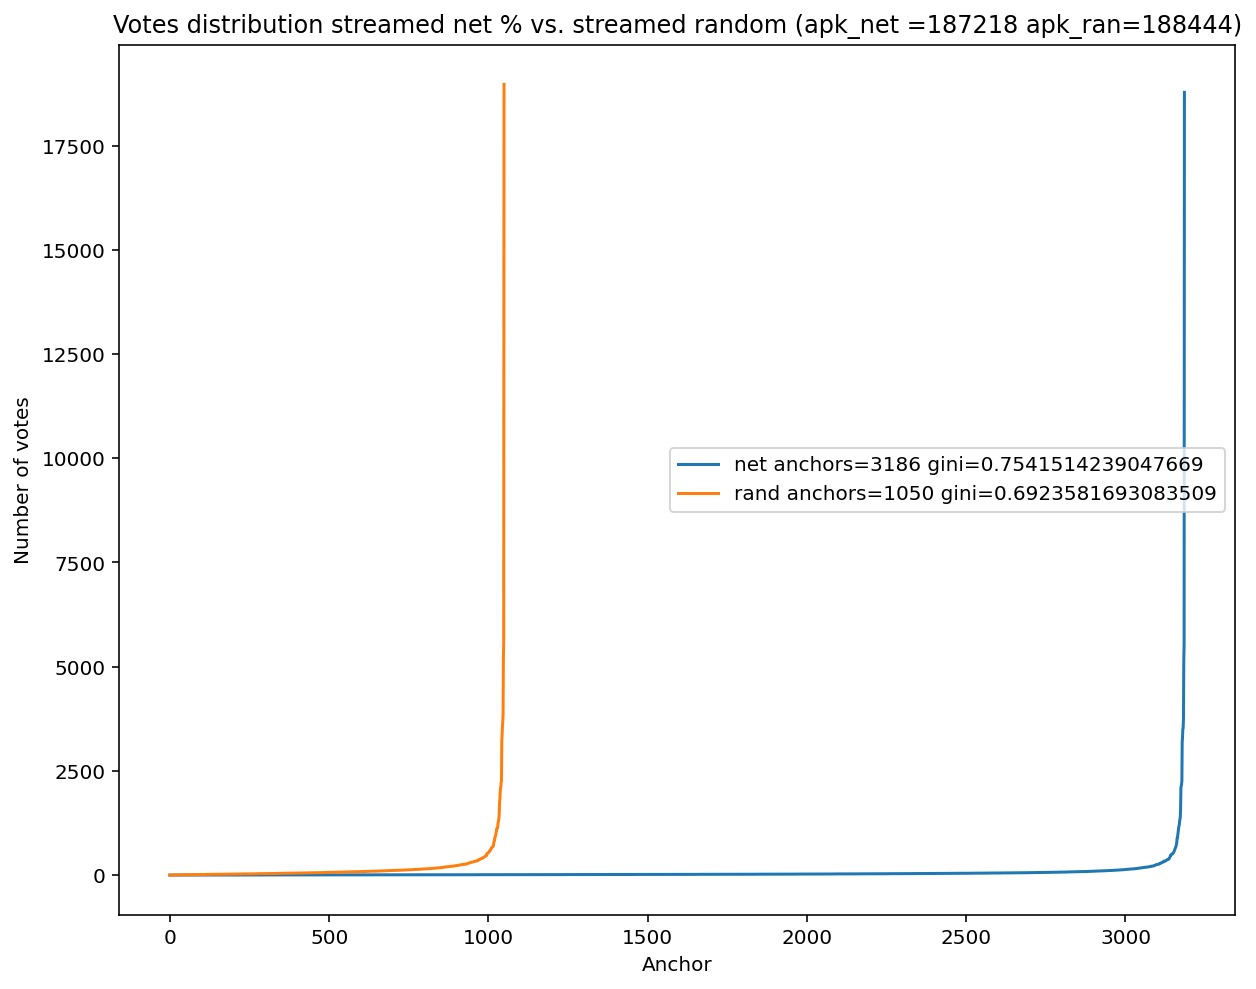

In [111]:
plot_with_gini(net=max_n8, ran=max_n2)

In [138]:
votes = list(map(sum, max_n8.values()))
v2 = list(map(sum, max_n2.values()))
vs4 = list(map(sum, r4[2][0].values()))
vs5 = list(map(sum, r[1][5].values()))

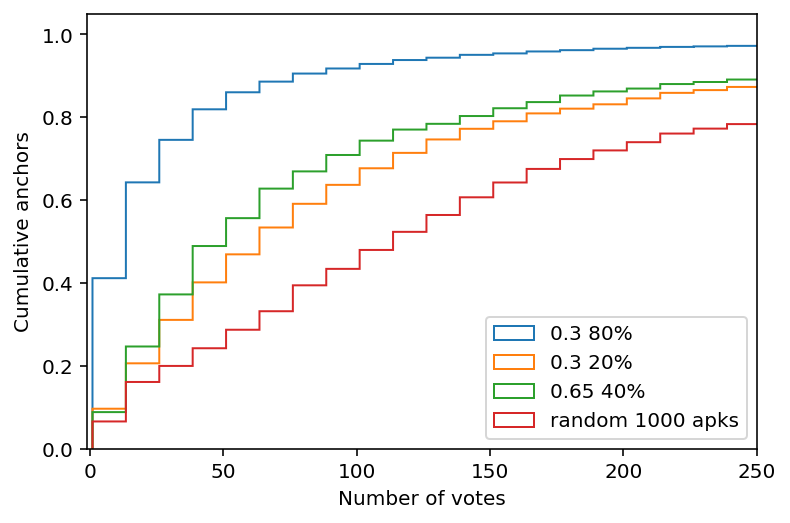

In [155]:
n, bins, patches=plt.hist(votes,bins=1500,density=True, histtype='step', cumulative=True, label='0.3 80%')
n, bins, pathces = plt.hist(v2, bins=bins, density=True, histtype='step', cumulative=True, label='0.3 20%')
n, bins, pathces = plt.hist(vs4, bins=bins, density=True, histtype='step', cumulative=True, label='0.65 40%')
n, bins, pathces = plt.hist(vs5, bins=bins, density=True, histtype='step', cumulative=True, label='random 1000 apks')

plt.xlim(-1,250)

plt.xlabel('Number of votes')
plt.ylabel('Cumulative anchors');
plt.legend(loc=4);

## ginis for old data set

In [2]:
import pickle

with open('../res/newres/new_merged_merged.pickle', 'rb') as f:
    nets_merged = pickle.load(f)
    
with open('../res/newres/new_merged_ref.pickle', 'rb') as f:
    nets_reference = pickle.load(f)
    
with open('../res/newres/new_streamed_vot.pickle', 'rb') as f:
    nets_streamed = pickle.load(f)

In [49]:
mer = get_cof(nets=nets_merged.values())
stra = get_cof(nets=nets_streamed.values())

ref = get_cof(nets=nets_reference.values())

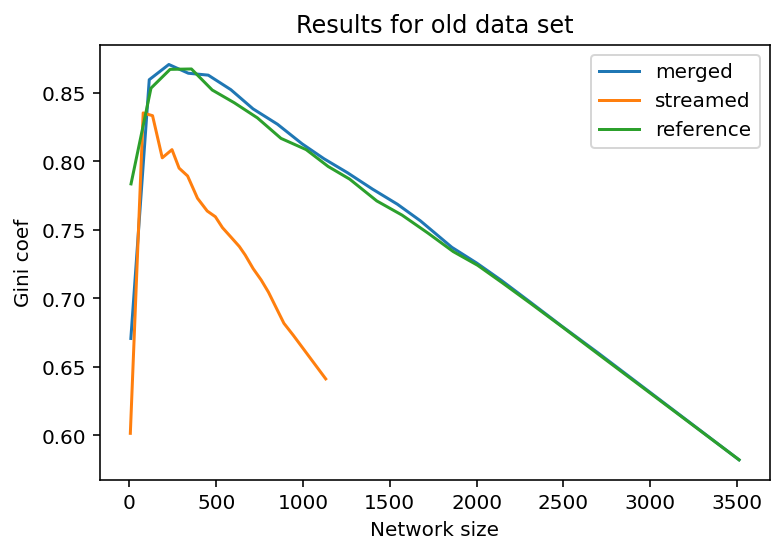

In [50]:
plt.title('Results for old data set')
plt.plot(mer.keys(), mer.values(), label='merged')
plt.plot(stra.keys(), stra.values(), label='streamed')
plt.plot(ref.keys(), ref.values(), label='reference')
plt.xlabel('Network size')
plt.ylabel('Gini coef')

plt.legend();

In [39]:
gms = extract_sizes(f"../res/newclusterres/break04/4/*-evalresults.pickle")
print('Got sizes: ',gms)
    
nets = dict()
for size in gms:
    #merged-1007-0-tc-nets-voting.pickle
    net_name = f"../res/newclusterres/break04/1/merged-{size}-0-tc-nets-voting.pickle"

    _, net = load_net(net_name)
    nets[size]= net


Got sizes:  [0.65, 0.75, 0.85, 0.95]


In [41]:
newres = get_cof(nets=nets)

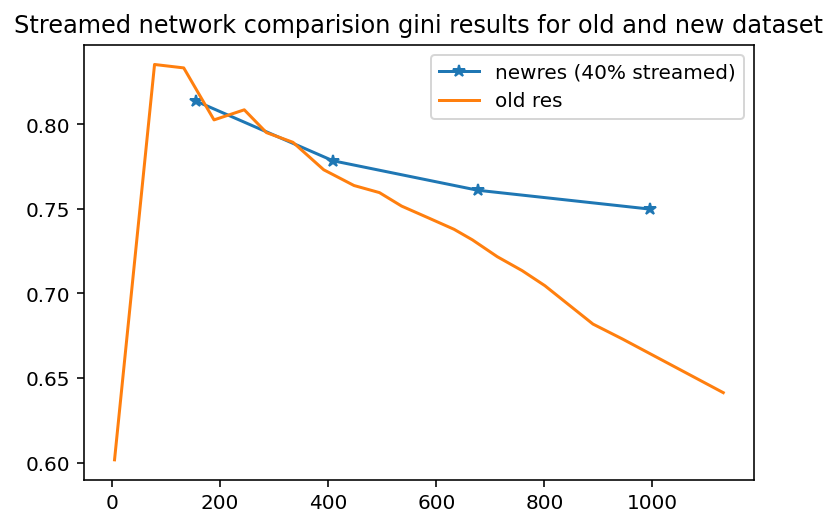

In [46]:
plt.title('Streamed network comparision gini results for old and new dataset')
plt.plot(newres.keys(), newres.values(),'-*', label='newres (40% streamed)')
plt.plot(stra.keys(), stra.values(), label='old res')

plt.legend();

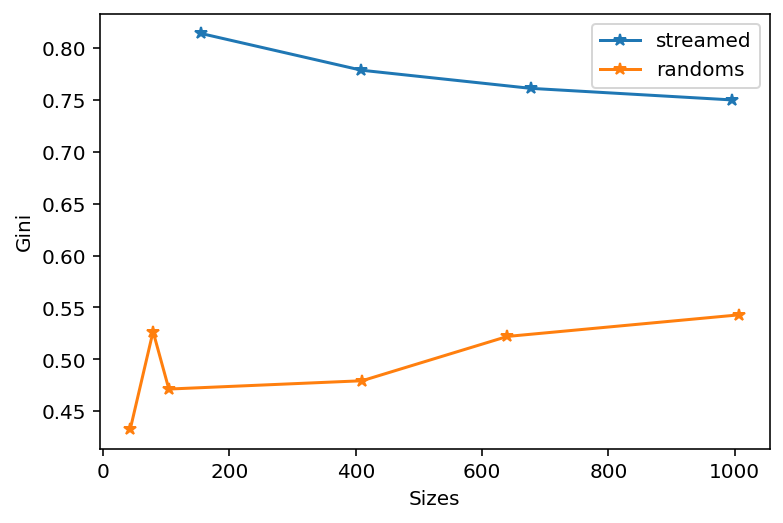

In [58]:
gstre = get_cof(nets=r4[1])
gran = get_cof(nets=r[1])

plt.plot(gstre.keys(), gstre.values(),'-*', label='new res: streamed')
plt.plot(gran.keys(), gran.values(),'-*', label='new res: randoms')
plt.xlabel('Sizes')
plt.ylabel('Gini')

plt.legend();

In [84]:
def read_and_ginis(perc):
    largers = dict()
    for f in glob.glob(f"../res/newclusterres/2ndrun/*-{perc}/merged-*.pickle"):
        g, n = load_net(f)
        largers[g] = n

    lgi = get_cof(largers.values())
    lgi = dict(sorted(lgi.items()))
    return lgi

In [88]:
lgi8 = read_and_ginis(perc=8)
lgi6 = read_and_ginis(perc=6)
lgi2 = read_and_ginis(perc=2)
lgi4 = read_and_ginis(perc=4)

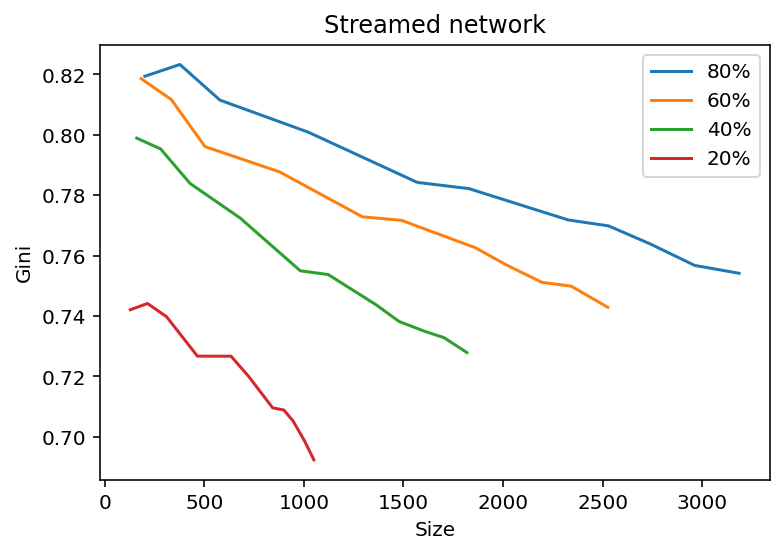

In [92]:
plt.title('Streamed network')
plt.plot(lgi8.keys(), lgi8.values(), label='80%')
plt.plot(lgi6.keys(), lgi6.values(), label='60%')
plt.plot(lgi4.keys(), lgi4.values(), label='40%')
plt.plot(lgi2.keys(), lgi2.values(), label='20%')

#plt.plot(gran.keys(), gran.values(),'-*', label='randoms')

plt.xlabel('Size')
plt.ylabel('Gini');
plt.legend();